In [1]:
import time
import numpy as np
import networkx as nx
from utils.dotdict import dotdict
import matplotlib.pyplot as plt
from numba import jit

import itertools
import multiprocessing

from utils.graph_generator import get_graph

from scripts.awareness.agent_country import Agent_Country

In [2]:
args = dotdict({
    "logfile": "log/temp.log",
    "plot": False,
    "max_iteration": 1000,
    "beta_super":0.0,
    "xi": 1,
    "p_teleport":0.0,
    "MAX_E_TIME":10,
    "MAX_I_TIME":10,
    "super_infected_agents": [],
    "p_super": 0.0,
    "awM": None,
    "awR": -1,
    "random_seed":0,
    "CPU_cores":15,
    "simnum":10,
})

In [136]:

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def run(args, graph, beta, gamma, n, awM, random_seed=0):
    args = dotdict(args)
    args["infected_agents"]=list(sorted(np.random.randint(0,n**2, size=50)))
    #args["infected_agents"]=[n//2+(n//2)*n]
    args["beta"]=beta
    args["gamma"]=gamma
    args["awM"] = awM


    res = np.zeros(shape=(args["max_iteration"], 4))

    country = Agent_Country(args, graph)
    country.init_seeds = args["infected_agents"]
    Agent_Country.numba_random_seed(random_seed)
    country.log_json()
    for i in range(args["max_iteration"]):
        res[i,2]=np.sum(country.states ==2)
        if country.check_stop():
            pass
        country.step()
        country.log_json()

    return res[:i,2]

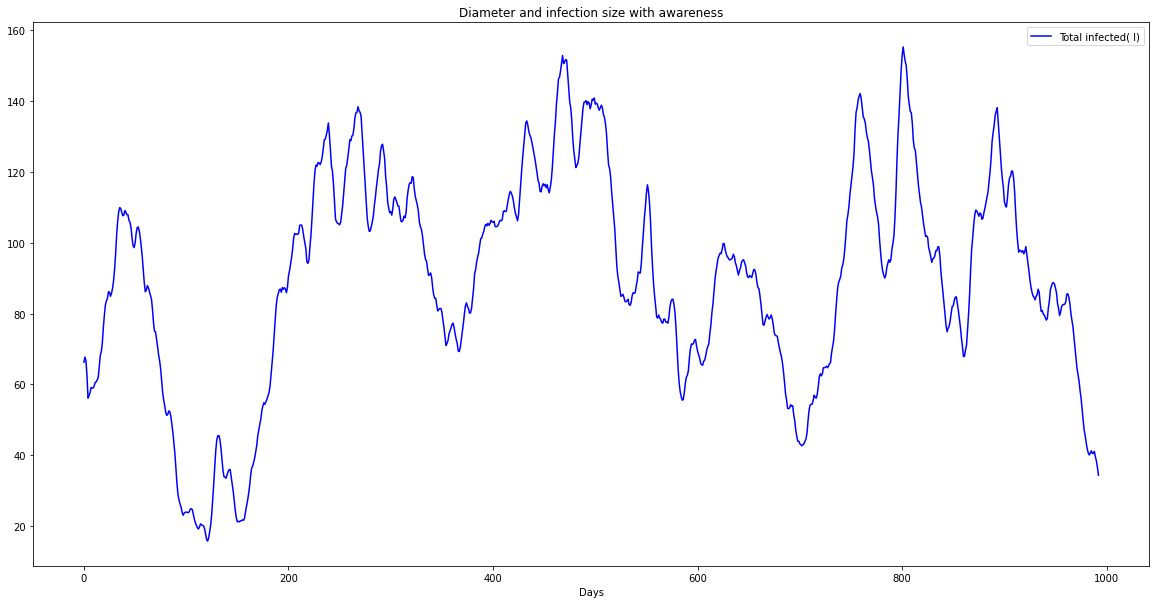

In [142]:
n=30
graph = get_graph("random-regular", {"n": n*n, "N": -1, "d": 4})

np.random.seed(np.random.randint(0,100))
res = run(args, graph, 0.105, 0.3, n, 0.0, np.random.randint(0,100))

plt.figure(figsize=(20,10))

plt.plot(moving_average(res,7), c='b', label="Total infected( I)")

plt.legend()


plt.xlabel("Days")
plt.title("Diameter and infection size with awareness")
plt.show()

In [143]:
d = np.mean(list(dict(nx.degree(graph)).values()))
mu = 0.3

In [144]:
mu/(d-1)

0.09999999999999999